# Create Benchmark and Statistic models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.arima.model import ARIMA
%load_ext autoreload 
%autoreload 2
import functions as fun
#from sklearn.metrics import negative_log_likelyhood

,epoch_utc,emission_factor,datetime_de,windon_forecast,windoff_forecast,solar_forecast,prices_forecast,aggregated_generation_forecast,AT_import,AT_export,...,DK_import,DK_export,LU_import,LU_export,NL_import,NL_export,PL_import,PL_export,CH_import,CH_export
0,1.546297e+09,298.240217,2018-12-31 23:00:00+00:00,18879.75,5069.00,0.0,28.32,57054.0,61.0,4940.0,...,901.0,0.0,12.0,418.0,0.0,1354.0,224.0,0.0,0.0,800.0
1,1.546301e+09,266.522473,2019-01-01 00:00:00+00:00,20626.50,5042.25,0.0,10.07,57400.0,60.0,5073.0,...,316.0,0.0,16.0,398.0,0.0,1158.0,0.0,0.0,1.0,801.0
2,1.546304e+09,262.594215,2019-01-01 01:00:00+00:00,22355.50,5028.50,0.0,-4.08,57275.0,20.0,4284.0,...,0.0,405.0,19.0,379.0,0.0,1176.0,0.0,0.0,0.0,800.0
3,1.546308e+09,260.190772,2019-01-01 02:00:00+00:00,24032.50,4977.75,0.0,-9.91,58024.0,3.0,4273.0,...,0.0,619.0,23.0,373.0,0.0,1428.0,0.0,0.0,0.0,800.0
4,1.546312e+09,250.496683,2019-01-01 03:00:00+00:00,25452.00,4907.25,0.0,-7.41,59301.0,0.0,4961.0,...,0.0,689.0,27.0,370.0,0.0,1492.0,0.0,0.0,0.0,800.0


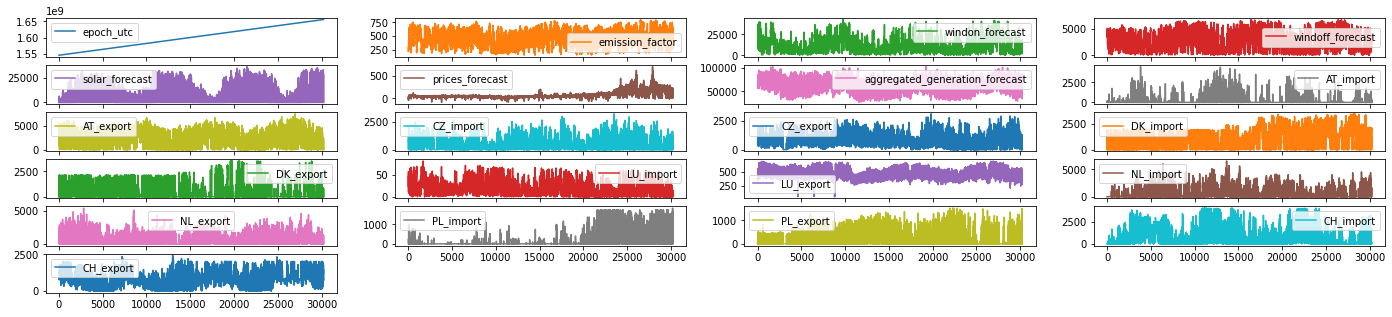

In [2]:
# 
dataset = pd.read_csv('training_data.csv')
dataset = dataset.drop(['Unnamed: 0'], axis = 1)
dataset.plot(subplots=True, layout=(14, 4), figsize=(24, 12))
dataset.head()

In [20]:
date =pd.to_datetime(features.datetime_de)

In [3]:
co2 = dataset['emission_factor']
cols_features = [c for c in dataset.columns if c != 'emission_factor']
cols = {c: i for i, c in enumerate(dataset.columns)}
indices = {ind: i for i, ind in enumerate(dataset.index)}
features = dataset.loc[:, [j for j in cols if j != 'emission_factor' and j in cols_features]]

In [4]:
co2.head()
#plt.plot(co2)

0    298.240217
1    266.522473
2    262.594215
3    260.190772
4    250.496683
Name: emission_factor, dtype: float64

In [5]:
features.head()

,epoch_utc,datetime_de,windon_forecast,windoff_forecast,solar_forecast,prices_forecast,aggregated_generation_forecast,AT_import,AT_export,CZ_import,...,DK_import,DK_export,LU_import,LU_export,NL_import,NL_export,PL_import,PL_export,CH_import,CH_export
0,1.546297e+09,2018-12-31 23:00:00+00:00,18879.75,5069.00,0.0,28.32,57054.0,61.0,4940.0,1076.0,...,901.0,0.0,12.0,418.0,0.0,1354.0,224.0,0.0,0.0,800.0
1,1.546301e+09,2019-01-01 00:00:00+00:00,20626.50,5042.25,0.0,10.07,57400.0,60.0,5073.0,514.0,...,316.0,0.0,16.0,398.0,0.0,1158.0,0.0,0.0,1.0,801.0
2,1.546304e+09,2019-01-01 01:00:00+00:00,22355.50,5028.50,0.0,-4.08,57275.0,20.0,4284.0,0.0,...,0.0,405.0,19.0,379.0,0.0,1176.0,0.0,0.0,0.0,800.0
3,1.546308e+09,2019-01-01 02:00:00+00:00,24032.50,4977.75,0.0,-9.91,58024.0,3.0,4273.0,111.0,...,0.0,619.0,23.0,373.0,0.0,1428.0,0.0,0.0,0.0,800.0
4,1.546312e+09,2019-01-01 03:00:00+00:00,25452.00,4907.25,0.0,-7.41,59301.0,0.0,4961.0,0.0,...,0.0,689.0,27.0,370.0,0.0,1492.0,0.0,0.0,0.0,800.0


#### inspect co2 data and make train, test, val split

In [6]:
co2.describe() 

count    30239.000000
mean       464.354124
std        141.599300
min        150.882862
25%        357.954288
50%        474.091124
75%        575.249999
max        797.968947
Name: emission_factor, dtype: float64

In [10]:
train_ratio = 0.7
val_ratio = 0.9
#test_ratio = 0.1

n = len(co2)
assert(n == len(features))
co2_train = co2[0:int(n*train_ratio)]
co2_long_train = co2[0:int(n*val_ratio)]
co2_val = co2[int(n*train_ratio):int(n*val_ratio)]
co2_test = co2[int(n*val_ratio):]
co2_test_plot = co2_test.copy()
co2_test_plot.index = co2[:len(co2_test)].index
assert(len(co2_train) == int(train_ratio*len(features)))

## statsistcal case
co2_stat = co2[0:len(co2)-24]
co2_stat_test = co2[len(co2)-24:]


In [8]:
assert(len(co2_stat_test) == 24)

In [9]:
co2_train.describe()

count    21167.000000
mean       449.590643
std        140.317600
min        150.882862
25%        339.426273
50%        457.547373
75%        560.837909
max        782.462741
Name: emission_factor, dtype: float64

### SARIMA

In [12]:
import pmdarima as pm

In [13]:
#co2_train_short = co2[0:int(0.1*len(co2))]
model_sarma_auto = pm.auto_arima(co2_train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=2, # maximum p and q
                     m=24,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=1, start_Q=1,
                      max_P= 2, max_Q= 2,
                      D=None, 
                     trace=True,
                     error_action='ignore',  
                      suppress_warnings=True, 
                     stepwise=True)
print(model_sarma_auto.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[24] intercept   : AIC=inf, Time=87.71 sec
 ARIMA(0,0,0)(0,0,0)[24] intercept   : AIC=269367.763, Time=0.40 sec
 ARIMA(1,0,0)(1,0,0)[24] intercept   : AIC=178568.829, Time=39.57 sec
 ARIMA(0,0,1)(0,0,1)[24] intercept   : AIC=232595.156, Time=52.30 sec
 ARIMA(0,0,0)(0,0,0)[24]             : AIC=320629.088, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[24] intercept   : AIC=190879.214, Time=0.92 sec
 ARIMA(1,0,0)(2,0,0)[24] intercept   : AIC=inf, Time=260.72 sec
 ARIMA(1,0,0)(1,0,1)[24] intercept   : AIC=inf, Time=76.64 sec
 ARIMA(1,0,0)(0,0,1)[24] intercept   : AIC=184093.076, Time=26.94 sec
 ARIMA(1,0,0)(2,0,1)[24] intercept   : AIC=inf, Time=489.87 sec
 ARIMA(0,0,0)(1,0,0)[24] intercept   : AIC=257870.169, Time=42.30 sec
 ARIMA(2,0,0)(1,0,0)[24] intercept   : AIC=160122.879, Time=76.74 sec
 ARIMA(2,0,0)(0,0,0)[24] intercept   : AIC=168211.282, Time=1.39 sec
 ARIMA(2,0,0)(2,0,0)[24] intercept   : AIC=158464.661, Time=300.84 sec
 ARIMA

In [ ]:
forecast_period =24
config = (3,0,1)
seasonal_config = (2,0,0,24)
pred_sarma, res_sarma = sarimax_forecast(co2_long_train, forecast_period, config, seasonal_config)
pred_sarma = walk_forwad_validation(co2, co2_test, forecast_period, res_sarma, pred_sarma)
result_sarma = evaluation(co2_test, pred_sarma, method = 'Autoregression')
print(result_sarma)

#### validtaion

In [14]:
forecast_period = int(len(co2_val) / 8)
config_sarma = (3,0,1)
seasonal_config = (2,0,0,24)
model_sarma = SARIMAX(co2_train, order = config_sarma, seasonal_order = seasonal_config)
res_sarma = model_sarma.fit()

d:\ABajrami\thesis\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
d:\ABajrami\thesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [17]:
forecast_period = int(len(co2_val) / 8)

In [19]:
pred_sarma_val,report_sarma_val,lower_sarma_val,upper_sarma_val = fun.walk_forwad_validation_arima(co2_val, forecast_period, res_sarma, alpha_low=0.025, alpha_high=0.975, n_features=0, method = 'SARMA')
print(report_sarma_val)

MAE for SARMA: 131.76 g_CO2/kWh
MAPE for SARMA: 26.87 %
RMSE for SARMA: 157.01 g_CO2/kWh
Pinball for lower Quantile SARMA: 19.76 g_CO2/kWh
Pinball for higher Quantile SARMA: 15.2 g_CO2/kWh
Interval Score SARMA: 1398.5128 g_CO2/kWh
Real Values insisde PI SARMA: 99.98 %
R2 SARMA: -39.190000000000005 %
Adjusted R2 SARMA: -39.190000000000005 %


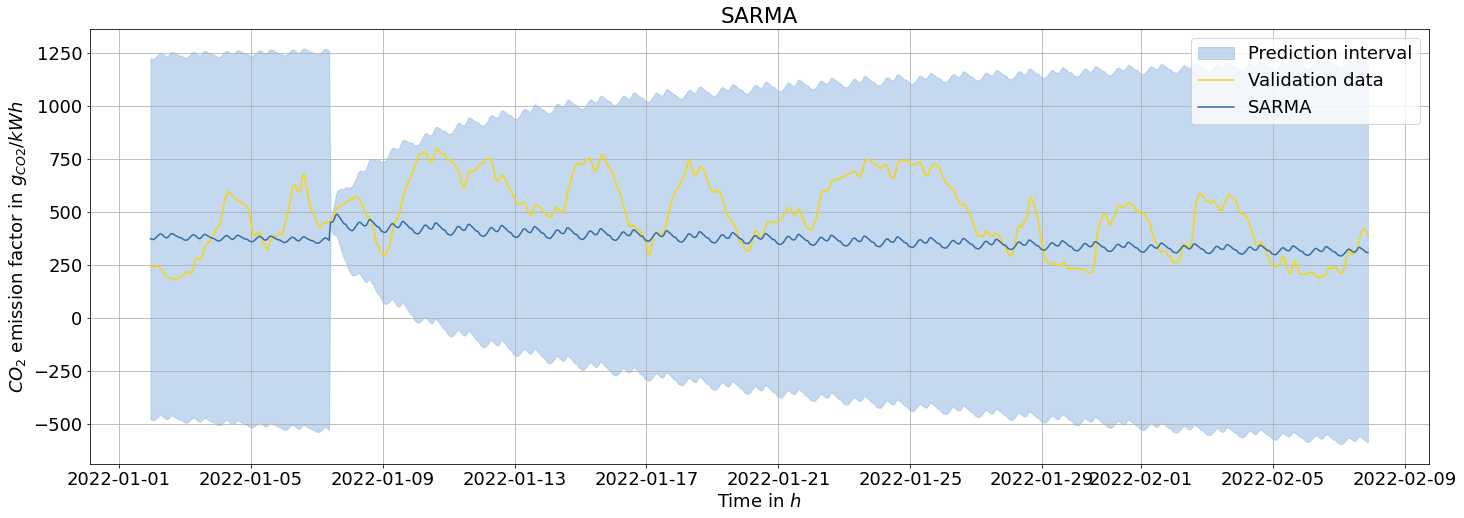

In [24]:
pred_sarma_df = pd.DataFrame(pred_sarma_val)
pred_sarma_df.to_csv('sarmax_mean_wf_test.csv')
pred_sarma_df.head()
upper_val_df = pd.DataFrame(lower_sarma_val)
upper_val_df.to_csv('sarmax_upper_wf_test.csv')
upper_val_df.head()
lower_val_df = pd.DataFrame(upper_sarma_val)
lower_val_df.to_csv('sarmax_lower_wf_test.csv')
lower_val_df
date_val = date[int(n*train_ratio):int(n*val_ratio)]
date_test = date[int(n*val_ratio):n]
fun.plot_model_uncertainty2(co2_val, pred_sarma_df,lower_val_df ,upper_val_df, date_val, slice_start = '2022-01-01 23:00', slice_end =  '2022-02-15 23:00' , method = 'SARMA')

### test

In [25]:
forecast_period =24
config_sarma = (3,0,1)
seasonal_config = (2,0,0,24)
model_sarma = SARIMAX(co2_long_train, order = config_sarma, seasonal_order = seasonal_config)
res_sarma = model_sarma.fit()

d:\ABajrami\thesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [27]:
pred_sarma,report_sarma,lower_sarma,upper_sarma = fun.walk_forwad_validation_arima(co2_test, forecast_period, res_sarma, alpha_low=0.025, alpha_high=0.975, n_features=0, method = 'SARMA')
print(report_sarma)

In [ ]:
pred_sarma_df = pd.DataFrame(pred_sarma)
pred_sarma_df.to_csv('sarmax_mean_wf_test.csv')
pred_sarma_df.head()
upper_test_df = pd.DataFrame(lower_sarma)
upper_test_df.to_csv('sarmax_upper_wf_test.csv')
upper_test_df.head()
lower_test_df = pd.DataFrame(upper_sarma)
lower_test_df.to_csv('sarmax_lower_wf_test.csv')
lower_test_df
date_val = date[int(n*train_ratio):int(n*val_ratio)]
date_test = date[int(n*val_ratio):n]
fun.plot_model_uncertainty(co2_test, pred_sarma_df, lower_test_df , upper_test_df, date_test, '2022-03-01 00:00', '2022-03-15 00:00', 'SARMAX')